In [1]:
from glob import glob
import numpy as np
import pyabf
import matplotlib.pyplot as plt
import matplotlib as mp
from open_abf import *
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.optimize import leastsq
%matplotlib widget

In [54]:
pathToData = "/home/alan/Documents/LAB/CSHL/Data/Carlo Astrocytes/"
file_iv = glob(pathToData+"*0005*.abf")[0]
file_19 = glob(pathToData+"*19*.abf")[0]
file_20  = glob(pathToData+"*0020*.abf")[0]

### Activation

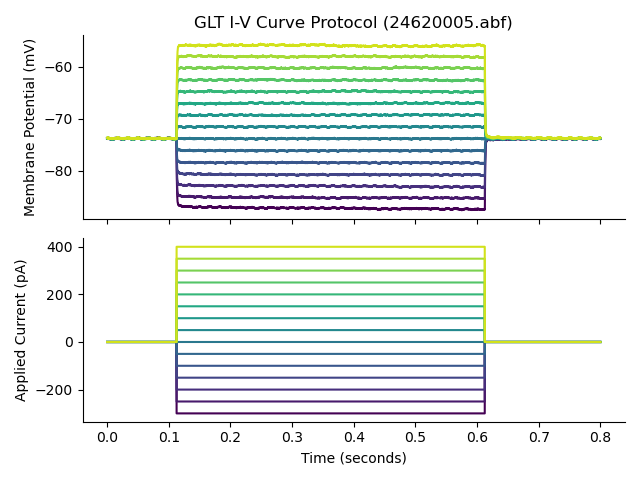

In [9]:
f = file_iv
plot_swps(f)

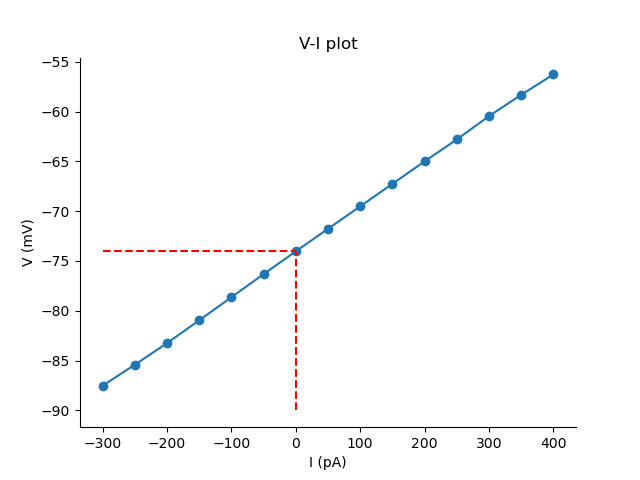

In [26]:
## Extract the sweeps
swps, swp_time, sr = get_sweeps(f)
## The mean on your voltage step:
i_start = 0.2
i_end = 0.5
current_step = np.mean(swp_window(swps,i_start,i_end,sr,channel=1),axis=1)
## The mean on your voltage step:
v_start = 0.05
v_end = 0.1
voltage_baseline = np.mean(swp_window(swps,v_start,v_end,sr,channel=0),axis=1)
## the pic response in your current:
v_start = 0.2
v_end = 0.5
voltage_window = swp_window(swps,v_start,v_end,sr,channel=0)
voltage_response = np.array([swp[np.argmax(np.abs(swp))] for swp in voltage_window])
## normalise over baseline
# voltage_response -= voltage_baseline
## Create a figure plot with this line:
fig,ax = plt.subplots()
ax.set_title('V-I plot')
ax.plot(current_step,voltage_response,'-o')
ax.hlines(-74,xmin=-300,xmax=0,color='red',linestyle='dashed')
ax.vlines(0,ymin=-90,ymax=-74,color='red',linestyle='dashed')
ax.set_ylabel('V (mV)')
ax.set_xlabel('I (pA)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

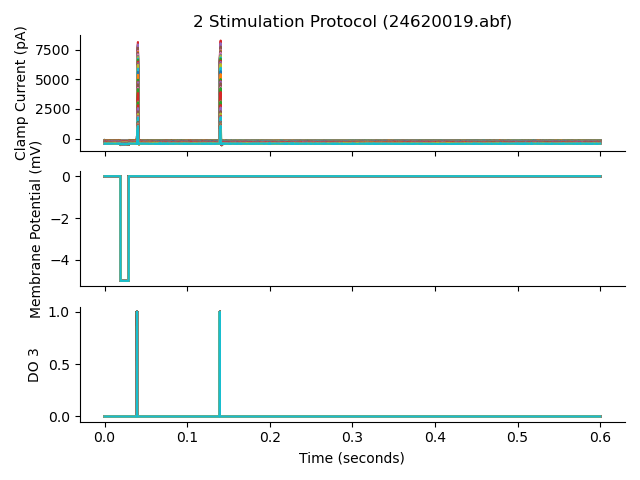

In [45]:
f = file_19
plot_swps_DO(f,[3])

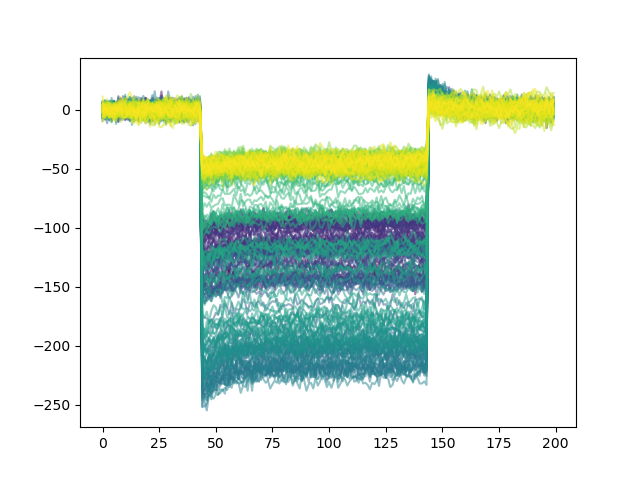

In [40]:
plt.close('all')
swps, swp_time, sr = get_sweeps(f)
seal_test = swp_window(swps,0.015,0.035,sr,channel=0)
cmap = mp.colormaps['viridis']
fig,ax = plt.subplots()
i_test = []
for i,test in enumerate(seal_test):
    color = cmap(i/len(seal_test))[:-1]
    test -= np.mean(test[:10])
    ax.plot(test,alpha=0.5,color=color,label = f'Sweep {i}')
    i_test.append(np.mean(test[125:140]))

In [32]:
def findstim(do,sr):
    ones = np.where(do)[1]
    stim = [ones[0]]
    on = stim[0]
    for one in ones[1:]:
        if (one-on) > 1:
            stim.append(one)
        on = one
    return np.array(stim)/sr

In [34]:
swps,DO,swp_time,sr = get_sweeps_DO(f,[3])
stims = findstim(DO[0],sr)
print(stims*1e3) ## stim times in ms

[ 39.3 139.4]


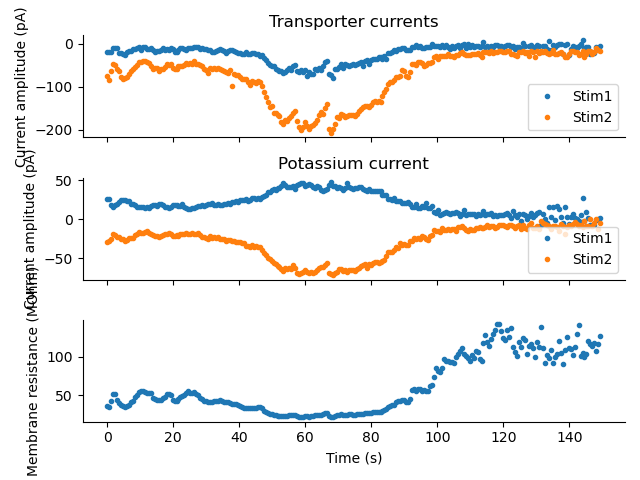

In [48]:
## The mean on you current baseline:
i_start = 0.36
i_end = 0.38
current_base = np.mean(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
## The mean on your voltage step:
i_start = 0.0408
i_end = 0.0445
current_response = np.min(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
Stim1 = current_response - current_base
## The mean on your voltage step:
i_start = 0.05
i_end = 0.055
current_response = np.mean(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
Stim1_K = current_response - current_base
## The mean on your voltage step:
i_start = 0.136
i_end = 0.138
current_base = np.mean(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
## the pic response in your current:
i_start = 0.1408
i_end = 0.145
current_response = np.min(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
Stim2 = current_response - current_base
## The mean on your voltage step:
i_start = 0.15
i_end = 0.155
current_response = np.mean(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
Stim2_K = current_response - current_base

swp_t = 600e-3
nb_swp = len(Stim1)
x = np.arange(nb_swp)*swp_t
fig,ax = plt.subplots(3,sharex=True)
ax[0].set_title('Transporter currents')
ax[0].plot(x,Stim1,'.',label='Stim1')
ax[0].plot(x,Stim2,'.',label='Stim2')
ax[0].set_ylabel('Current amplitude (pA)')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].legend(loc='lower right')
ax[1].set_title('Potassium current')
ax[1].plot(x,Stim1_K,'.',label='Stim1')
ax[1].plot(x,Stim2_K,'.',label='Stim2')
ax[1].set_ylabel('Current amplitude (pA)')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].legend(loc='lower right')
Rm = -5/np.array(i_test)
ax[2].plot(x,Rm*1e3,'.')
ax[2].set_ylabel('Membrane resistance (MOhm)')
ax[2].set_xlabel('Time (s)')
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
fig.tight_layout()
plt.show()

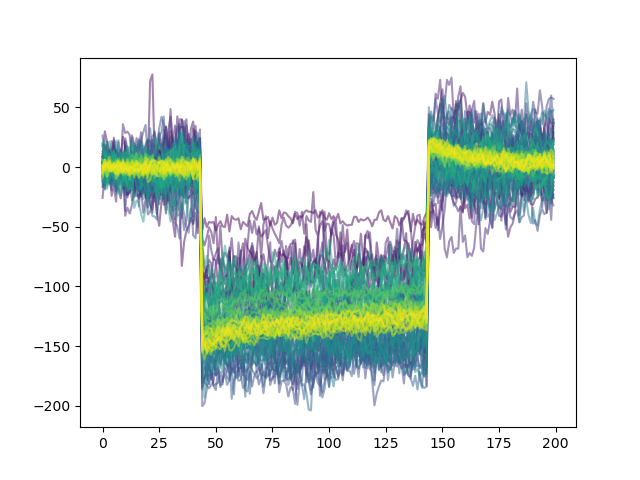

In [56]:
f = file_20
swps, swp_time, sr = get_sweeps(f)
seal_test = swp_window(swps,0.015,0.035,sr,channel=0)
cmap = mp.colormaps['viridis']
fig,ax = plt.subplots()
i_test = []
for i,test in enumerate(seal_test):
    color = cmap(i/len(seal_test))[:-1]
    test -= np.mean(test[:10])
    ax.plot(test,alpha=0.5,color=color,label = f'Sweep {i}')
    i_test.append(np.mean(test[125:140]))
## The mean on you current baseline:
i_start = 0.36
i_end = 0.38
current_base = np.mean(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
## The mean on your voltage step:
i_start = 0.0408
i_end = 0.0445
current_response = np.min(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
Stim1_20 = current_response - current_base
## The mean on your voltage step:
i_start = 0.05
i_end = 0.055
current_response = np.mean(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
Stim1_K_20 = current_response - current_base
## The mean on your voltage step:
i_start = 0.136
i_end = 0.138
current_base = np.mean(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
## the pic response in your current:
i_start = 0.1408
i_end = 0.145
current_response = np.min(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
Stim2_20 = current_response - current_base
## The mean on your voltage step:
i_start = 0.15
i_end = 0.155
current_response = np.mean(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
Stim2_K_20 = current_response - current_base

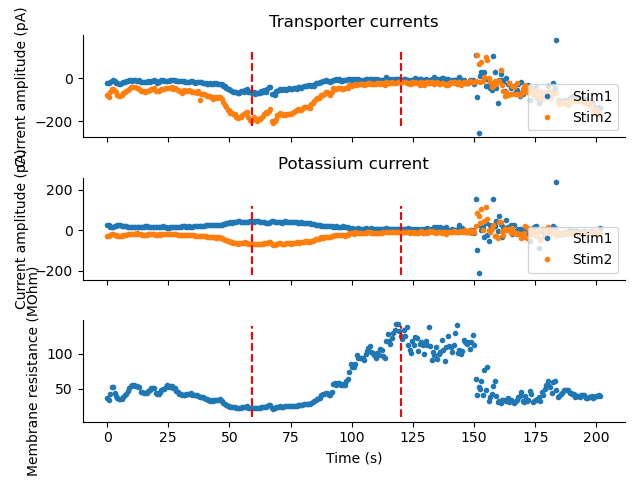

In [62]:
swp_t = 600e-3
nb_swp = len(Stim1) + len(Stim1_20)
x = np.arange(nb_swp)*swp_t
## Combine the traces
S1 = np.concatenate([Stim1,Stim1_20])
S2 = np.concatenate([Stim2,Stim2_20])
S1K = np.concatenate([Stim1_K,Stim1_K_20])
S2K = np.concatenate([Stim2_K,Stim2_K_20])
Rm_20 = -5/np.array(i_test)
R = np.concatenate([Rm,Rm_20])
fig,ax = plt.subplots(3,sharex=True)
ax[0].set_title('Transporter currents')
ax[0].plot(x,S1,'.',label='Stim1')
ax[0].plot(x,S2,'.',label='Stim2')
ax[0].set_ylabel('Current amplitude (pA)')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].legend(loc='lower right')
ax[1].set_title('Potassium current')
ax[1].plot(x,S1K,'.',label='Stim1')
ax[1].plot(x,S2K,'.',label='Stim2')
ax[1].set_ylabel('Current amplitude (pA)')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].legend(loc='lower right')
ax[2].plot(x,R*1e3,'.')
ax[2].set_ylabel('Membrane resistance (MOhm)')
ax[2].set_xlabel('Time (s)')
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
cues = np.array([99,200])*0.6
for c in cues:
    ax[0].vlines(c,ymin=-220,ymax=120,color="red",linestyle="dashed")
    ax[1].vlines(c,ymin=-220,ymax=120,color="red",linestyle="dashed")
    ax[2].vlines(c,ymin=10,ymax=140,color="red",linestyle="dashed")
fig.tight_layout()
plt.show()